In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
test_data = pd.read_csv("organized_data_training.csv")

In [21]:
print(test_data)

          TestTime  TestBldg
0     9/7/14 00:00  0.094276
1     9/7/14 01:00  0.037037
2     9/7/14 02:00  0.040404
3     9/7/14 03:00  0.037037
4     9/7/14 04:00  0.037037
..             ...       ...
163  9/13/14 19:00  0.164983
164  9/13/14 20:00  0.235690
165  9/13/14 21:00  0.185185
166  9/13/14 22:00  0.168350
167  9/13/14 23:00  0.121212

[168 rows x 2 columns]


In [19]:
build_avg_consumption = []
build_std_consumption = []
for i in range(19):
    if i != 5:
        temp = np.mean(test_data["Bldg%d (kWh)"%(i+1)])
        build_avg_consumption.append(temp)
        build_std_consumption.append(np.std(test_data["Bldg%d (kWh)"%(i+1)]))
print(build_avg_consumption)


KeyError: 'Bldg1 (kWh)'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

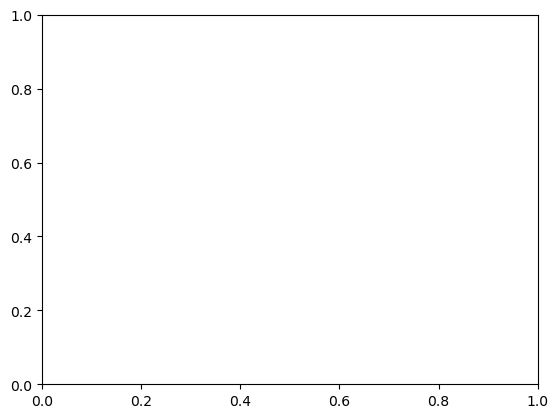

In [20]:
building_index = [i+1 for i in range(18)]
fig, ax = plt.subplots()
ax.bar(building_index, build_avg_consumption)
ax.errorbar(building_index, build_avg_consumption, yerr=build_std_consumption, fmt='o', color='red')
ax.set_xlabel('Building index')
ax.set_ylabel('Average Consumption')

In [12]:
build_avg_consumption = []
build_std_consumption = []
build_max_consumption = []
for i in range(19):
    if i != 5:
        temp = np.mean(test_data["Bldg%d (kWh)"%(i+1)])
        build_avg_consumption.append(temp)
        build_std_consumption.append(np.std(test_data["Bldg%d (kWh)"%(i+1)]))
        build_max_consumption.append(np.max(test_data["Bldg%d (kWh)"%(i+1)]))

In [16]:
size = len(test_data) * 18
random_data = np.random.rand(size, 5)

# Create a pandas DataFrame from the numpy array
organized_data = pd.DataFrame(random_data, columns=['Building_index', 'week_of_year', 'day_of_week', 'hour_of_day',"normalized_energy"])
index = 0

build_max_consumption = []
for i in range(19):
    if i == 5:
        build_max_consumption.append(None)
    if i != 5:
        build_max_consumption.append(np.max(test_data["Bldg%d (kWh)"%(i+1)]))

for i in range(len(test_data)):
    temp = test_data.loc[i]
    date_string = temp["Start Time (GMT-0800,PST)"]
    date_obj = datetime.datetime.strptime(date_string, '%m/%d/%y %H:%M')
    week_of_year = date_obj.isocalendar()[1]
    day_of_week = date_obj.weekday()
    hour_of_day = date_obj.hour
    for j in range(19):
        if j != 5:
            value = temp["Bldg%d (kWh)"%(j+1)] / build_max_consumption[j]
            organized_data.loc[index] = [(j+1), week_of_year, day_of_week,hour_of_day, value ]
            index += 1
print(organized_data)

        Building_index  week_of_year  day_of_week  hour_of_day  \
0                  1.0           1.0          6.0          0.0   
1                  2.0           1.0          6.0          0.0   
2                  3.0           1.0          6.0          0.0   
3                  4.0           1.0          6.0          0.0   
4                  5.0           1.0          6.0          0.0   
...                ...           ...          ...          ...   
154219            15.0          52.0          5.0         23.0   
154220            16.0          52.0          5.0         23.0   
154221            17.0          52.0          5.0         23.0   
154222            18.0          52.0          5.0         23.0   
154223            19.0          52.0          5.0         23.0   

        normalized_energy  
0                0.234568  
1                0.082343  
2                0.021277  
3                0.006536  
4                0.393939  
...                   ...  
154219     

In [ ]:
grouped = organized_data.groupby(["week_of_year",'day_of_week',"Building_index",'hour_of_day'])['normalized_energy'].mean()